In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime 
from haversine import haversine

from IPython.display import display

In [2]:
# Importing the Dataset

dataset=pd.read_csv(r"C:\Users\Sarthak Arora\Analytics Vidhya\BOOTCAMP CLASSES\NYC Trip Data Duration\nyc_taxi_trip_duration.csv")
dataset.drop(columns=["Unnamed: 11","Unnamed: 12"],inplace=True)
dataset.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,29-02-2016 16:40,29-02-2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,11-03-2016 23:35,11-03-2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,21-02-2016 17:59,21-02-2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,05-01-2016 9:44,05-01-2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,17-02-2016 6:42,17-02-2016 6:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
dataset.shape

(729322, 11)

Our Dataset contains 729322 rows and 11 columns

In [4]:
dataset[["passenger_count","trip_duration"]].describe()

,passenger_count,trip_duration
count,729322.000000,7.293220e+05
mean,1.662055,9.522291e+02
std,1.312446,3.864626e+03
min,0.000000,1.000000e+00
25%,1.000000,3.970000e+02
50%,1.000000,6.630000e+02
75%,2.000000,1.075000e+03
max,9.000000,1.939736e+06


In [5]:
dataset.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Our Data Doesn't have any missing values

In [6]:
dataset.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

#### Some Datatypes need to be changed-
1. vendor_id, store_and_fwd_flag -> categorical
2. pickup_datetime, dropoff_datetime -> datetime

In [7]:
dataset.pickup_datetime = pd.to_datetime(dataset.pickup_datetime, format="%d-%m-%Y %H:%M")
dataset.dropoff_datetime = pd.to_datetime(dataset.dropoff_datetime, format="%d-%m-%Y %H:%M")

In [8]:
dataset.vendor_id=dataset["vendor_id"].astype("category")
dataset.store_and_fwd_flag=dataset["store_and_fwd_flag"].astype("category")

In [9]:
dataset.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

### We are creating a new variable which measures the Manhattan distance travelled by the taxi in each trip

In [10]:
dataset["distance"]=111139*abs(dataset.pickup_longitude-dataset.dropoff_longitude)+abs(dataset.pickup_latitude-dataset.dropoff_latitude)
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id1080784,2,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1106.547604
1,id0889885,1,2016-03-11 23:35:00,2016-03-11 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,715.684172
2,id0857912,2,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,5477.637988
3,id3744273,2,2016-01-05 09:44:00,2016-01-05 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,543.539520
4,id0232939,1,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,N,848,3216.204774


In [11]:
dataset["avg_speed"]=dataset["distance"]*60*60/(1000*dataset["trip_duration"])
dataset["avg_speed"]

0          9.958928
1          2.342239
2         12.060854
3          1.714936
4         13.653700
            ...    
729317    17.954202
729318     5.911312
729319     2.163636
729320     6.125573
729321    18.794059
Name: avg_speed, Length: 729322, dtype: float64

### Also, we are creating variables derived from Datetimes given to us

In [12]:
dataset['pickup_day_name'] = dataset['pickup_datetime'].dt.day_name()
dataset['dropoff_day_name']= dataset['dropoff_datetime'].dt.day_name()

In [13]:
dataset['pickup_time'] = dataset['pickup_datetime'].dt.hour
dataset['dropoff_time'] = dataset['dropoff_datetime'].dt.hour

In [14]:
dataset[dataset.pickup_datetime>dataset.dropoff_datetime]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_day_name,dropoff_day_name,pickup_time,dropoff_time


In [15]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_day_name,dropoff_day_name,pickup_time,dropoff_time
0,id1080784,2,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1106.547604,9.958928,Monday,Monday,16,16
1,id0889885,1,2016-03-11 23:35:00,2016-03-11 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,715.684172,2.342239,Friday,Friday,23,23
2,id0857912,2,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,5477.637988,12.060854,Sunday,Sunday,17,18
3,id3744273,2,2016-01-05 09:44:00,2016-01-05 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,543.539520,1.714936,Tuesday,Tuesday,9,10
4,id0232939,1,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,N,848,3216.204774,13.653700,Wednesday,Wednesday,6,6


In [16]:
dataset.describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,avg_speed,pickup_time,dropoff_time
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000,729322.000000,729322.00000
mean,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,2708.843903,10.629816,13.611698,13.60616
std,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,4355.018006,10.711357,6.402853,6.48637
min,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0.000000,0.000000,0.000000,0.00000
25%,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,690.218132,4.802708,9.000000,9.00000
50%,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,1401.646452,9.042801,14.000000,14.00000
75%,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,2682.035846,14.087260,19.000000,19.00000
max,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,660978.356561,4194.190315,23.000000,23.00000


### Checking Discrepencies in the Data Set (Data Validation)

## **ID**

In [17]:
dataset["id"].nunique()

729322

#### Each id uniquely identifies a row
<br>
We might want to see the patterns within these ids though

## **Vendor_ID**

In [18]:
display(dataset["vendor_id"].value_counts(normalize=True))
print("Total- "+ str(dataset["vendor_id"].value_counts().sum()))

2    0.535403
1    0.464597
Name: vendor_id, dtype: float64

Total- 729322


Text(0.5, 0, 'Vendor ID')

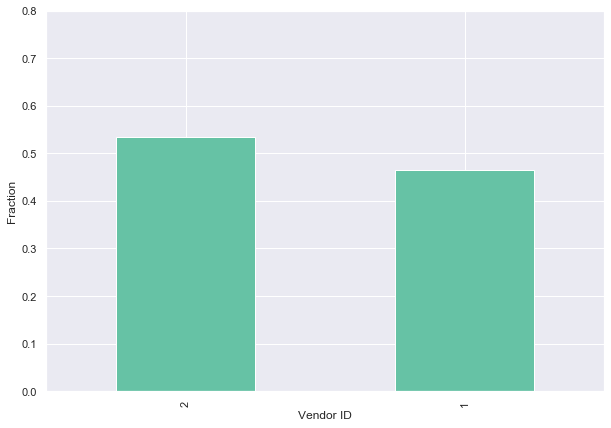

In [19]:
sns.set(palette="Set2")

plt.figure(figsize=(10,7))
plt.ylim((0.0,0.8))

dataset["vendor_id"].value_counts(normalize=True).plot(kind='bar')

plt.ylabel("Fraction")
plt.xlabel("Vendor ID")

#### vendor_id has two unique categories- 1 and 2
Vendor 2 gets slightly more rides than Vendor 1

## **Passenger_count**

In [20]:
dataset["passenger_count"].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

### We see that there is passenger_count of 0 as well, what would that mean?
We should inspect this 

In [21]:
dataset[dataset["passenger_count"]==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_day_name,dropoff_day_name,pickup_time,dropoff_time
3572,id3364866,1,2016-02-13 14:04:00,2016-02-13 14:21:00,0,-73.990479,40.742004,-73.989243,40.763679,N,1029,137.386145,0.480651,Saturday,Saturday,14,14
23847,id3485118,1,2016-05-11 19:15:00,2016-05-11 19:32:00,0,-73.987572,40.754566,-73.972031,40.762836,N,981,1727.228360,6.338453,Wednesday,Wednesday,19,19
45987,id2571672,1,2016-03-06 05:24:00,2016-03-06 05:25:00,0,-73.979698,40.761196,-73.979698,40.761196,Y,5,0.000000,0.000000,Sunday,Sunday,5,5
76998,id1253169,1,2016-02-28 01:08:00,2016-02-28 01:09:00,0,-74.035942,40.736488,-74.035942,40.736492,N,13,0.000004,0.000001,Sunday,Sunday,1,1
101709,id1220914,2,2016-01-17 20:51:00,2016-01-17 20:52:00,0,-73.959999,40.766861,-73.960106,40.766911,N,48,11.871918,0.890394,Sunday,Sunday,20,20


There are many trips which have trip_duration less than 10 seconds 

In [22]:
dataset[dataset["passenger_count"]==0].sort_values("distance").head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_day_name,dropoff_day_name,pickup_time,dropoff_time
501596,id3066152,1,2016-02-01 00:27:00,2016-02-01 00:27:00,0,-74.014488,40.708229,-74.014488,40.708229,N,45,0.0,0.0,Monday,Monday,0,0
592303,id2154895,1,2016-05-23 23:37:00,2016-05-23 23:37:00,0,-73.861633,40.705029,-73.861633,40.705029,N,8,0.0,0.0,Monday,Monday,23,23
45987,id2571672,1,2016-03-06 05:24:00,2016-03-06 05:25:00,0,-73.979698,40.761196,-73.979698,40.761196,Y,5,0.0,0.0,Sunday,Sunday,5,5
568782,id3533680,1,2016-01-10 04:17:00,2016-01-10 04:17:00,0,-73.993195,40.598701,-73.993195,40.598701,N,3,0.0,0.0,Sunday,Sunday,4,4
541539,id1610720,2,2016-03-13 14:08:00,2016-03-13 14:08:00,0,-73.922081,40.636040,-73.922081,40.636040,N,8,0.0,0.0,Sunday,Sunday,14,14


There are many which covered 0 metres, maybe trip was started by mistake and then realised by the driver later

In [23]:
dataset[dataset["trip_duration"]<10].sort_values("distance").head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_day_name,dropoff_day_name,pickup_time,dropoff_time
195197,id2251007,2,2016-05-23 14:20:00,2016-05-23 14:20:00,1,-73.781830,40.644699,-73.781830,40.644699,N,8,0.0,0.0,Monday,Monday,14,14
543304,id3062678,1,2016-04-06 21:38:00,2016-04-06 21:38:00,1,-73.982010,40.757099,-73.982010,40.757099,N,4,0.0,0.0,Wednesday,Wednesday,21,21
443300,id2509635,1,2016-03-07 10:52:00,2016-03-07 10:52:00,1,-73.790337,40.643955,-73.790337,40.643955,N,2,0.0,0.0,Monday,Monday,10,10
301923,id1792292,1,2016-06-30 18:09:00,2016-06-30 18:09:00,1,-73.794342,40.657082,-73.794342,40.657082,N,2,0.0,0.0,Thursday,Thursday,18,18
547110,id1189877,1,2016-04-06 12:35:00,2016-04-06 12:35:00,1,-73.891350,40.646751,-73.891350,40.646751,N,5,0.0,0.0,Wednesday,Wednesday,12,12


In [24]:
xy=dataset["passenger_count"].value_counts().to_frame().reset_index()
xy=xy.rename(columns={"passenger_count":"count","index":"passenger_count"})
xy=xy.sort_values(by="passenger_count")
xy["count"]=xy["count"]/dataset.shape[0]
xy

,passenger_count,count
6,0,0.000045
0,1,0.709447
1,2,0.144102
3,3,0.040712
5,4,0.019264
2,5,0.053373
4,6,0.033054
8,7,0.000001
7,9,0.000001


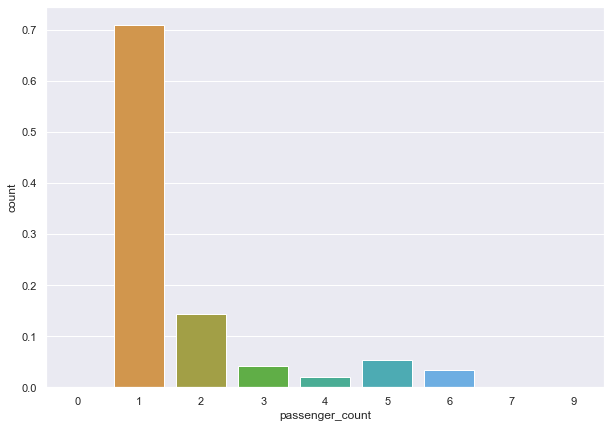

In [25]:
sns.set(palette="Set2")
plt.figure(figsize=(10,7))

sns.barplot(data=xy, y="count",x="passenger_count")

Around 71% of rides have only one passenger where as 14.5% have 2 passengers.

There are rides with 0,7 and 9 passengers as well.
We still have to investigate what is up with 0 passenger list.

We can also infer that people who carpool are very less.

In [26]:
display(dataset["store_and_fwd_flag"].value_counts(normalize=True))

N    0.994461
Y    0.005539
Name: store_and_fwd_flag, dtype: float64

Text(0.5, 0, 'store_and_fwd_flag')

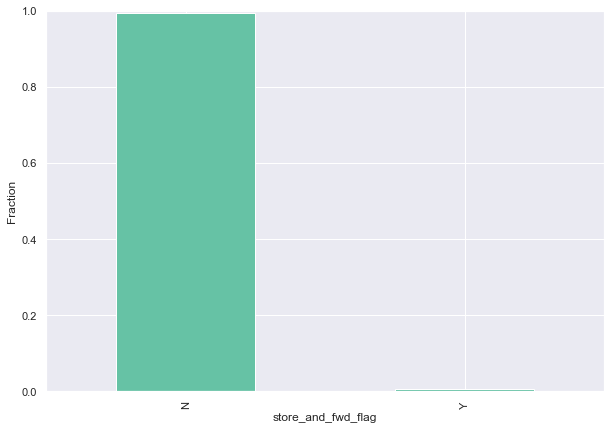

In [27]:
sns.set(palette="Set2")
plt.figure(figsize=(10,7))
plt.ylim((0.0,1.0))

dataset["store_and_fwd_flag"].value_counts(normalize=True).plot(kind='bar')

plt.ylabel("Fraction")
plt.xlabel("store_and_fwd_flag")

### 99.45 % of rides did not have any internet connection problems
Maybe the rest 0.55% of rides were intercity or to remote areas.
We should check if the 'Y' flagged have travelled more distance and hence the average time taken for the ride is more?

## **Distance**

In [28]:
dataset["distance"]

0         1106.547604
1          715.684172
2         5477.637988
3          543.539520
4         3216.204774
             ...     
729317    1476.234374
729318     517.239761
729319     404.479760
729320     760.591984
729321    6389.980029
Name: distance, Length: 729322, dtype: float64

In [29]:
dataset.distance.describe()

count    729322.000000
mean       2708.843903
std        4355.018006
min           0.000000
25%         690.218132
50%        1401.646452
75%        2682.035846
max      660978.356561
Name: distance, dtype: float64

In [30]:
dataset[dataset.distance==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_day_name,dropoff_day_name,pickup_time,dropoff_time
263,id3155891,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.996422,40.298828,-73.996422,40.298828,N,240,0.0,0.0,Tuesday,Tuesday,11,11
327,id0786923,2,2016-03-26 13:34:00,2016-03-26 13:37:00,1,-73.996323,40.753460,-73.996323,40.753460,N,159,0.0,0.0,Saturday,Saturday,13,13
795,id2323213,2,2016-06-13 16:49:00,2016-06-13 17:04:00,5,-73.967171,40.763500,-73.967171,40.763500,N,897,0.0,0.0,Monday,Monday,16,17
1176,id3235868,1,2016-02-29 21:39:00,2016-02-29 21:44:00,1,-73.995232,40.744038,-73.995232,40.744038,N,256,0.0,0.0,Monday,Monday,21,21
1257,id1865738,2,2016-03-13 11:38:00,2016-03-13 12:00:00,2,-73.912781,40.804428,-73.912781,40.804428,N,1330,0.0,0.0,Sunday,Sunday,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728720,id3423342,2,2016-05-05 21:32:00,2016-05-05 21:32:00,2,-73.977898,40.766392,-73.977898,40.766392,N,14,0.0,0.0,Thursday,Thursday,21,21
728775,id2618105,2,2016-03-13 20:06:00,2016-03-13 20:14:00,1,-73.974258,40.759895,-73.974258,40.759895,N,464,0.0,0.0,Sunday,Sunday,20,20
728838,id1232120,2,2016-05-29 04:04:00,2016-05-29 04:11:00,2,-73.984558,40.750839,-73.984558,40.750839,N,421,0.0,0.0,Sunday,Sunday,4,4
729025,id3524028,2,2016-04-06 18:03:00,2016-04-06 18:26:00,1,-74.083611,40.632401,-74.083611,40.632401,N,1369,0.0,0.0,Wednesday,Wednesday,18,18


**Around 3000 records has trips of zero distance, this could be due to various reasons like** :

- System error
- Rider cancelled the ride after accepting
- passenger canncelled after accepting

distance
(0, 10]     679797
(10, 20]     31357
(20, 30]     15010
(30, 40]       131
(40, 50]        69
(50, 60]        18
(60, 70]         8
(70, 80]         7
(80, 90]         9
Name: distance, dtype: int64

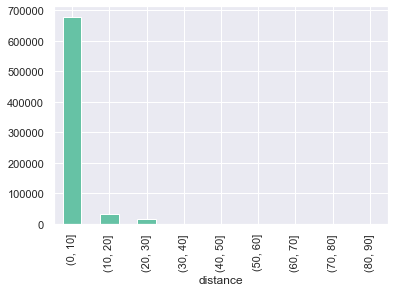

In [31]:
ab=(dataset['distance']/1000).groupby(pd.cut(dataset['distance']/1000, np.arange(0,100,10))).count()
display(ab)
ab.plot(kind='bar')
plt.show()

Most of our trips are between 0 and 10 kms, some between 10 and 20 also, 20 and 30.
<br>Very few beyond 30 kms

In [32]:
def cont_univ(x):
    sns.set(palette="Set1")
    plt.figure(figsize=(10,8))
    
    figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))


    
    sns.distplot(x,bins=25,kde=True,ax=ax[0])
    ax[0].set_title('Distribution of the trip duration')
    
    # calculating descriptives of variable
    mini = x.min()
    maxi = x.max()
    ran = x.max()-x.min()
    mean = x.mean()
    median = x.median()
    st_dev = x.std()
    skew = x.skew()
    kurt = x.kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    sns.lineplot(points, [0,0], color = 'black', label = "std_dev",ax=ax[0])
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max",ax=ax[0])
    sns.scatterplot([mean], [0], color = 'red', label = "mean",ax=ax[0])
    sns.scatterplot([median], [0], color = 'blue', label = "median",ax=ax[0])
    
    ax[0].set_title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
    
    sns.boxplot(x,ax=ax[1])
    ax[1].set_title('box plot of trip duration')

    
    plt.tight_layout()

<Figure size 720x576 with 0 Axes>

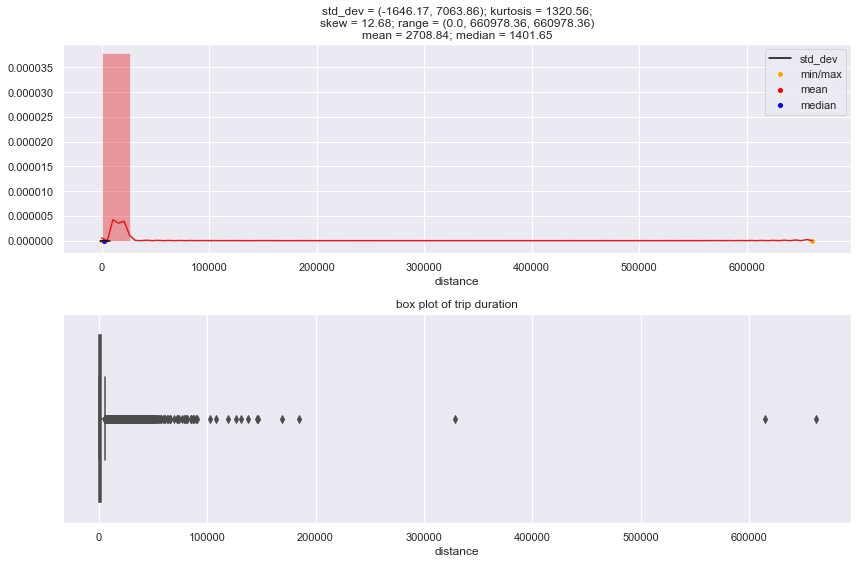

In [33]:
cont_univ(dataset.distance)

<Figure size 720x576 with 0 Axes>

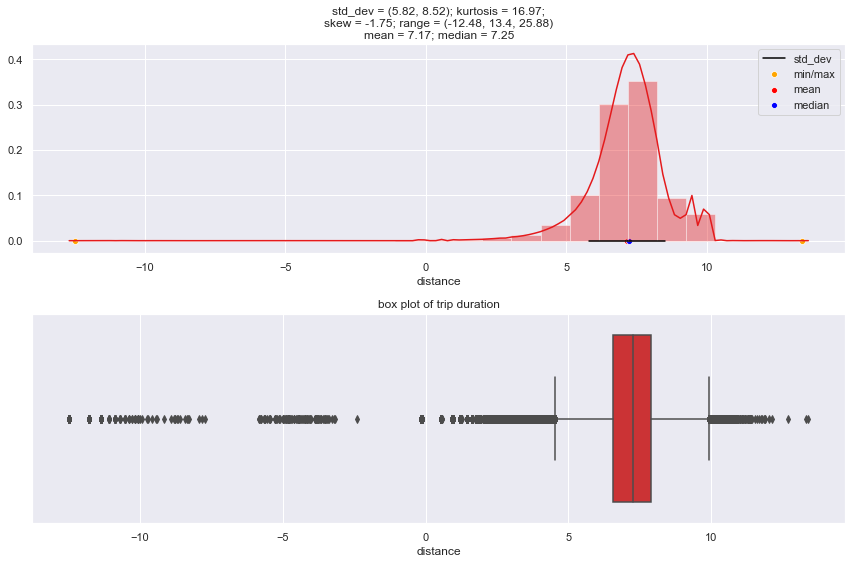

In [34]:
cont_univ(np.log(dataset[dataset.distance>0].distance))

When we logtransform our distance variable and see its distribution, we can see that it is Leptokurtic and slightly negatively skewed
<br>Whereas there are a lot of outliers in the original distance without log transform

<Figure size 720x576 with 0 Axes>

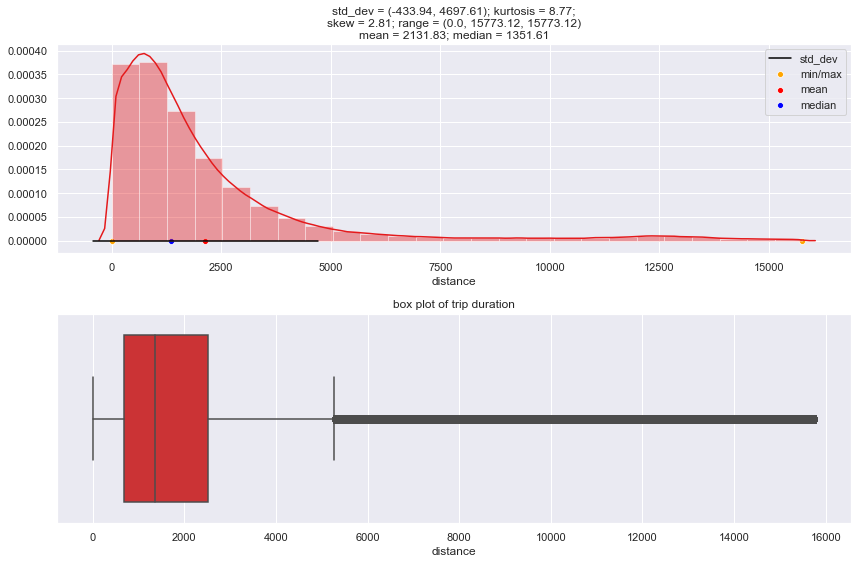

In [35]:
cont_univ(dataset[(dataset.distance<(dataset.distance.mean()+3*dataset.distance.std())) & (dataset.distance>(dataset.distance.mean()-3*dataset.distance.std()))].distance
)

After removing the outliers, we can see that the distribution looks more like a normal distribution

## **Trip_Duration**

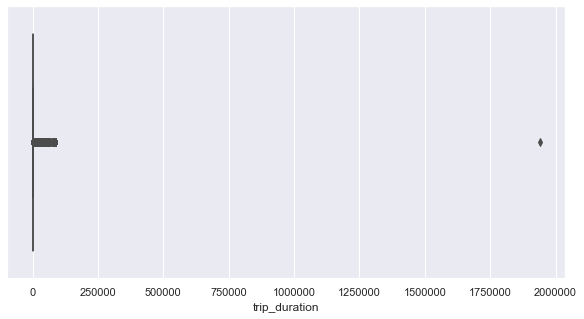

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(dataset['trip_duration'],orient='h')

We can clearly see that there is one point with very large value, let's analyse that one value

In [37]:
dataset[dataset.trip_duration==dataset.trip_duration.max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_day_name,dropoff_day_name,pickup_time,dropoff_time
21813,id1864733,1,2016-01-05 00:19:00,2016-01-27 11:08:00,1,-73.78965,40.643559,-73.95681,40.773087,N,1939736,18578.129214,0.03448,Tuesday,Wednesday,0,11


This looks like a 22 day trip! We have to further investigate this.

<Figure size 720x576 with 0 Axes>

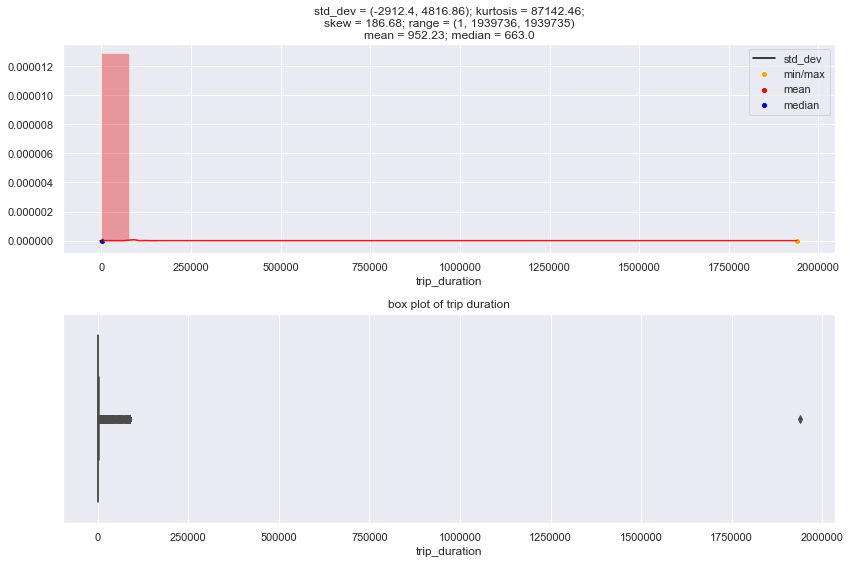

In [38]:
cont_univ(dataset.trip_duration)

<Figure size 720x576 with 0 Axes>

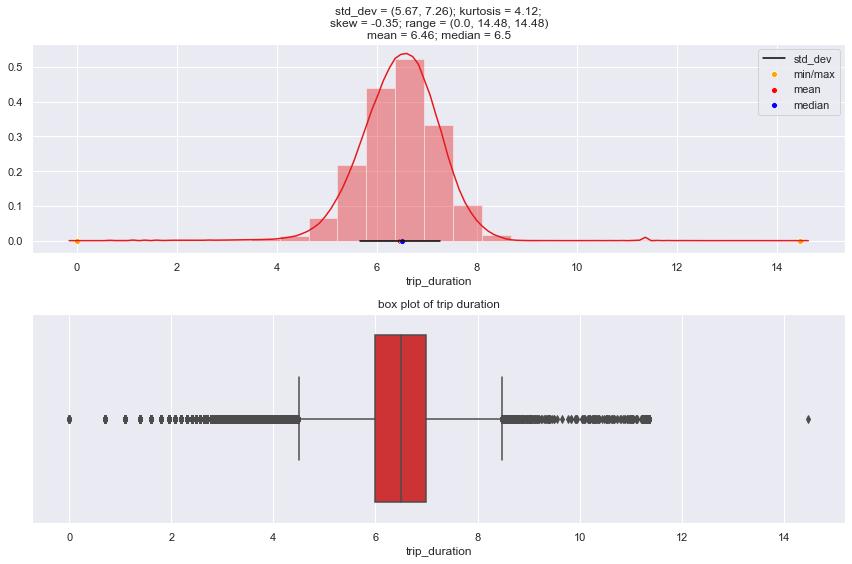

In [39]:
cont_univ(np.log(dataset[dataset.trip_duration>0].trip_duration))

<Figure size 720x576 with 0 Axes>

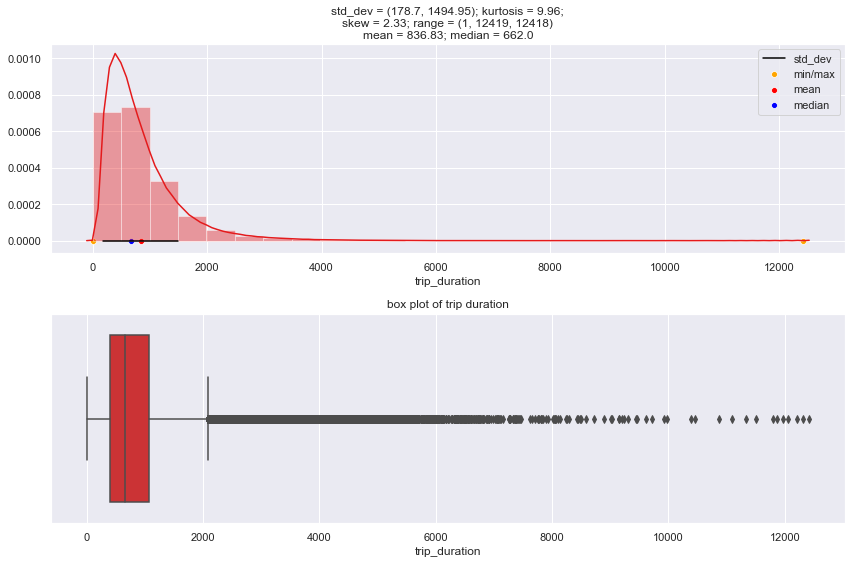

In [40]:
cont_univ(dataset[(dataset.trip_duration<(dataset.trip_duration.mean()+3*dataset.trip_duration.std())) & (dataset.trip_duration>(dataset.trip_duration.mean()-3*dataset.trip_duration.std()))].trip_duration)

When we log-transform, we can see that the chart looks like a normal distribution. So, we can see that our variable follows lognormal distribution

## **avg_speed**

In [41]:
dataset.avg_speed.describe()

count    729322.000000
mean         10.629816
std          10.711357
min           0.000000
25%           4.802708
50%           9.042801
75%          14.087260
max        4194.190315
Name: avg_speed, dtype: float64

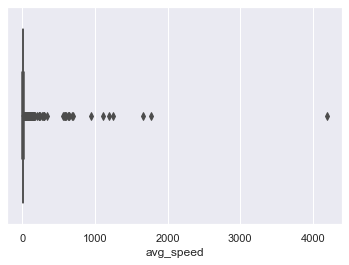

In [42]:
sns.boxplot(dataset.avg_speed)

In [43]:
refined=dataset[dataset.avg_speed<=200]
refined.shape

(729294, 17)

We have removed all the speeds which were unreal, as this high speed is not permitted on road for taxis

<Figure size 720x576 with 0 Axes>

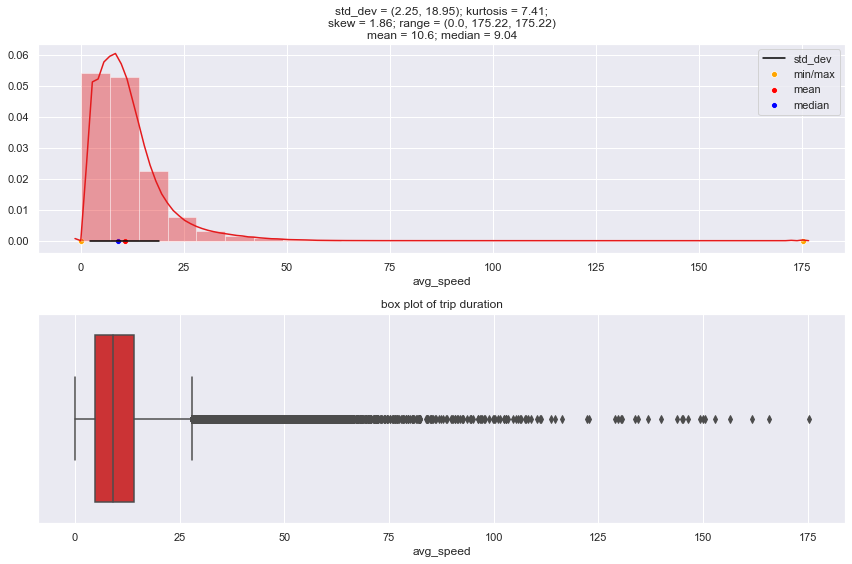

In [44]:
cont_univ(refined.avg_speed)

## Time related Variables

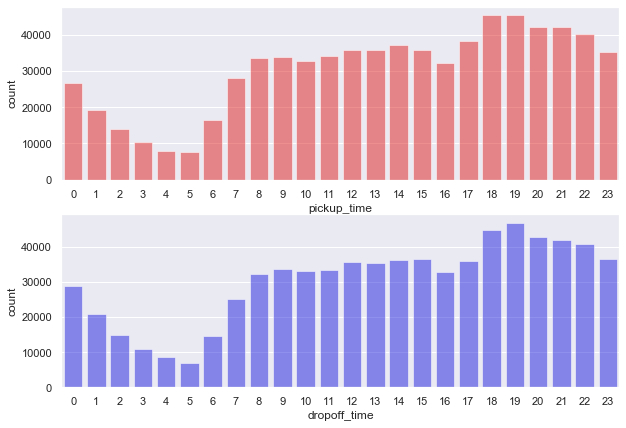

In [45]:
figure,ax= plt.subplots(nrows=2,ncols=1,figsize=(10,7))

sns.countplot(dataset.pickup_time,color='r',alpha=0.5,ax=ax[0])
sns.countplot(dataset.dropoff_time,color='b',alpha=0.5,ax=ax[1])

Shape more or less looks the same
<br>7-8PM,8-9PM are the busiest

In [46]:
cut_bins = [0,5,10,15,20,24]
names = ['Early Morning','Office Hours','Noon Hours','Evening','Night']

dataset['Pick_time_frame'] = pd.cut(dataset['pickup_time'],bins=cut_bins,labels=names)

dataset['Drop_time_frame'] = pd.cut(dataset['dropoff_time'],bins=cut_bins,labels=names)

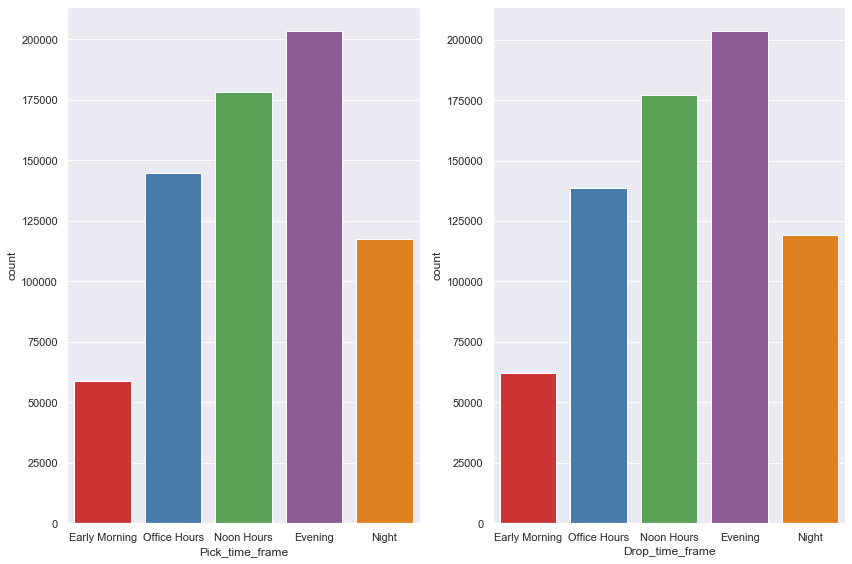

In [47]:
figure,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,8))

sns.countplot(dataset['Pick_time_frame'],ax=ax[0])

sns.countplot(dataset['Drop_time_frame'],ax=ax[1])

plt.tight_layout()

Most number of trips are during the evening time and the least number of trips is between late night to early morning

## **Day Wise**

In [48]:
dataset['pickup_day_name'].value_counts()

Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: pickup_day_name, dtype: int64

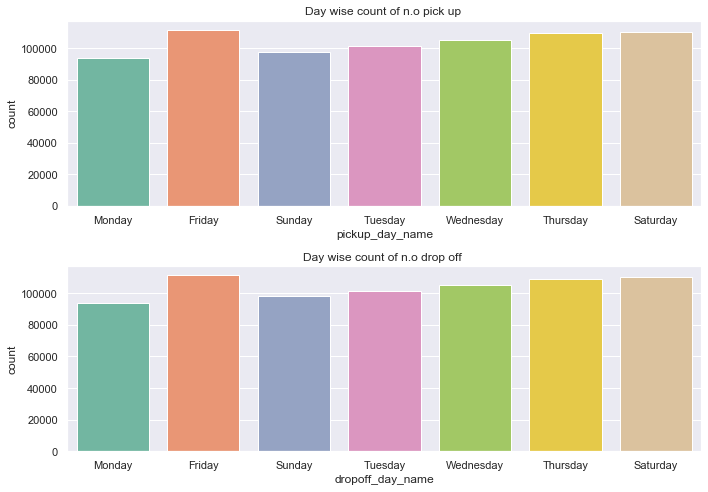

In [49]:
sns.set(palette="Set2")


figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,7))

sns.countplot(x='pickup_day_name', data=dataset,ax=ax[0])
ax[0].set_title('Day wise count of n.o pick up ')

sns.countplot(x='dropoff_day_name',data=dataset,ax=ax[1])
ax[1].set_title('Day wise count of n.o drop off ')

plt.tight_layout()

- Highest number of rides are recorded on friday's and Saturday's.

- Monday has the least number of trips. Also we can see a trend of increasing trips from monday to saturday and a decreasing trend from sunday through monday